<a href="https://colab.research.google.com/github/kingdraw69/class-ciencia-de-datos/blob/main/actividad_clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bar_char es gráfico de barras


#La ingeniería de las características
Es el proceso de usar el dominio del conocimiento de los datos para crear nuevas características (feature vectors) con el fin de lograr que los algoritmos de machine learning funcionen correctamente.

Feature vectors son vectores de n-dimensiones que representan un objeto. Muchos algoritmos de machine learning requieren una representación numérica de los objetos, ya que tales representaciones facilitan el procesamiento y el análisis estadístico.



##¿Cómo se hundió el titanic?
De acuerdo con lo conocido, por la proa del barco donde estaban las habitaciones de tercera clase.

Conclusión: Pclass es una feature **clave** para el clasificador

In [4]:
#Image(url="https://heraldodemexico.com.mx/u/fotografias/fotosnoticias/2021/4/14/355907.jpg")

In [5]:
#from google.colab import drive
#drive.mount('/content/drive')

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/titanic-train (2).csv')

In [7]:
def extract_title(data):
  title=data["Name"].str.extract("([A-Za-z]+)\.", expand=True)
  return title

In [8]:
df["Title"]=extract_title(df)

In [9]:
df["Title"].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


##2.1 Creando un mapeo de los títulos
Reemplazamos lo títulos encontrados por los siguientes valores:
* Mr: 0
* Miss: 1
* Mrs: 2
* Otros: 3

In [10]:
def replace_titles(data):
  title_mapping = {"Mr":0,"Miss":1,"Mrs":2}
  data["Title"] = data["Title"].map(title_mapping).fillna(3) #Si no es ninguno regresar 3
  return data

In [11]:
df=replace_titles(df)
df[["Name","Title"]].head()

,Name,Title
0,"Braund, Mr. Owen Harris",0.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2.0
2,"Heikkinen, Miss. Laina",1.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2.0
4,"Allen, Mr. William Henry",0.0


In [12]:
def bar_char(feature):
  survived=df[df["Survived"]==1][feature].value_counts()
  dead=df[df["Survived"]==0][feature].value_counts()
  test=pd.DataFrame([survived,dead])
  test.index=["Sobrevivientes","Fallecidos"]
  test.plot(kind="bar",stacked=True,figsize=(10,5))

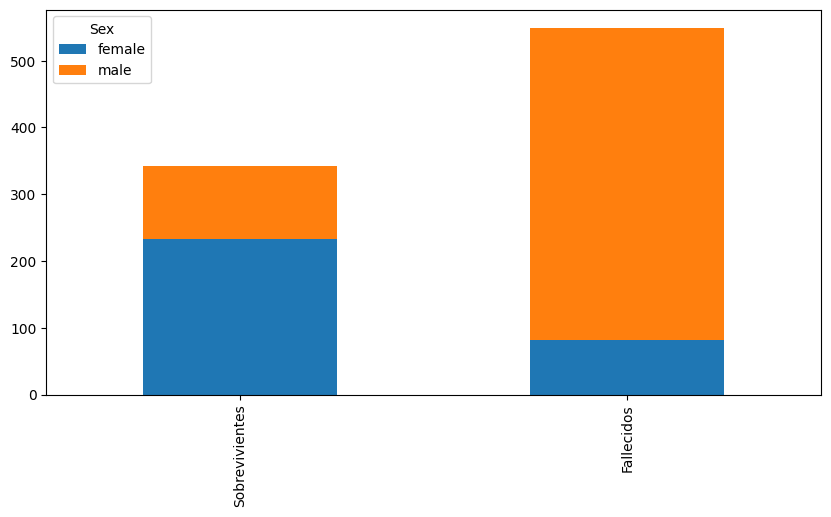

In [13]:
bar_char("Sex")

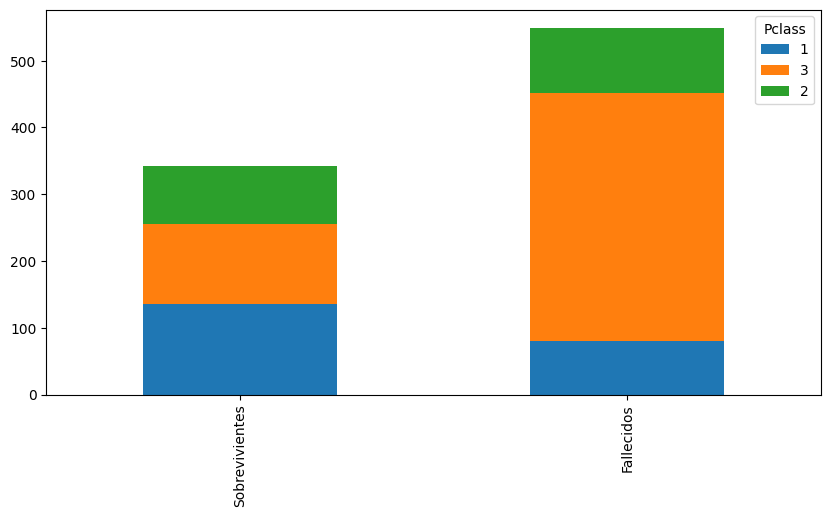

In [14]:
bar_char("Pclass")

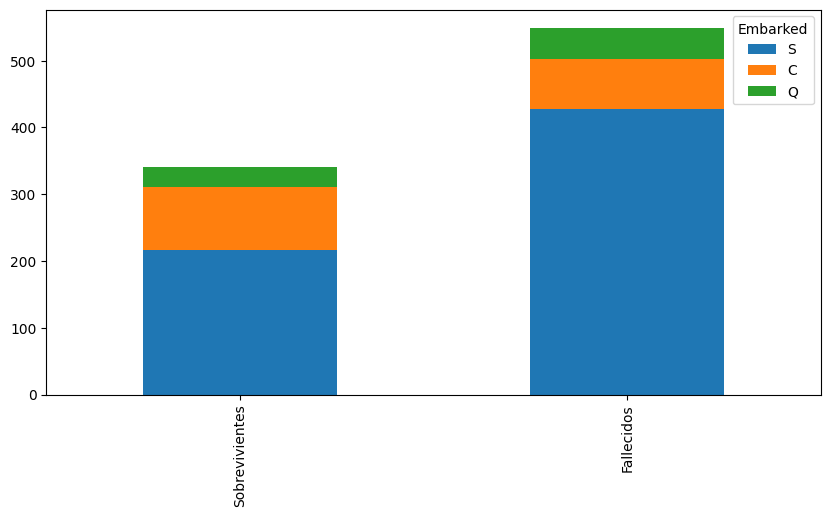

In [15]:
bar_char("Embarked")

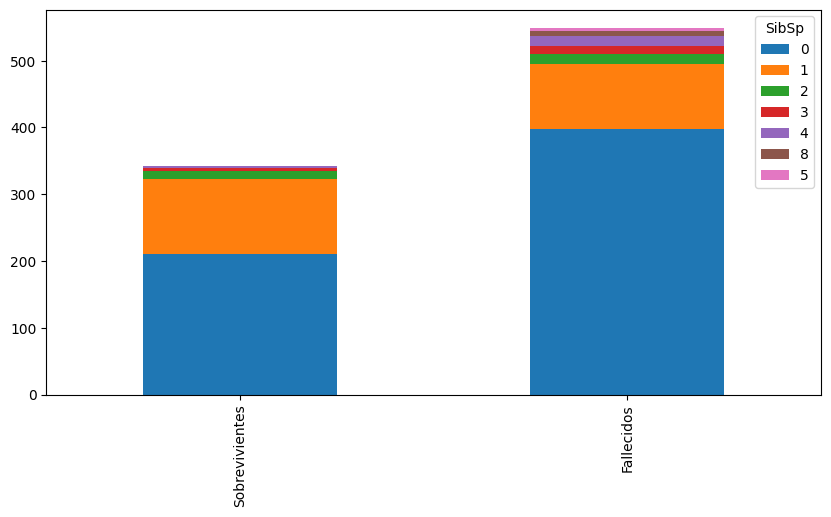

In [16]:
bar_char("SibSp")

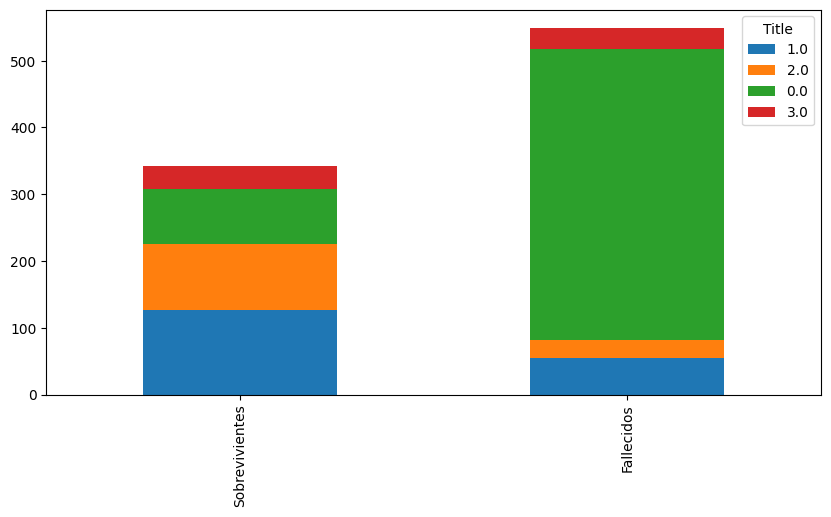

In [17]:
bar_char("Title")

Se observa que las Mss tenían mayores probabilidades de sobrevivir, mientras que los señores la menor probabilidad de sobrevivir

##2.4 Edad
###2.4.1 Rellenar los NaN en edades
Estrategia: Se calcula la media de los títulos y se reemplaza por las edades faltantes

In [18]:
title_age_means=df.groupby("Title")["Age"].mean()
title_age_means

,Age
Title,
0.0,32.368090
1.0,21.773973
2.0,35.898148
3.0,20.430161


In [19]:
df["Age"]=df.apply(lambda row: title_age_means[row["Title"]] if pd.isnull(row["Age"]) else row["Age"],axis=1)
#apply es poner sobre, si es nulo q lo rellene y si no q lo deje quieto

In [20]:
df[["Title","Age"]].sample(15)

,Title,Age
390,0.0,36.00000
879,2.0,56.00000
217,0.0,42.00000
788,3.0,1.00000
9,2.0,14.00000
157,0.0,30.00000
621,0.0,42.00000
422,0.0,29.00000
150,3.0,51.00000
878,0.0,32.36809


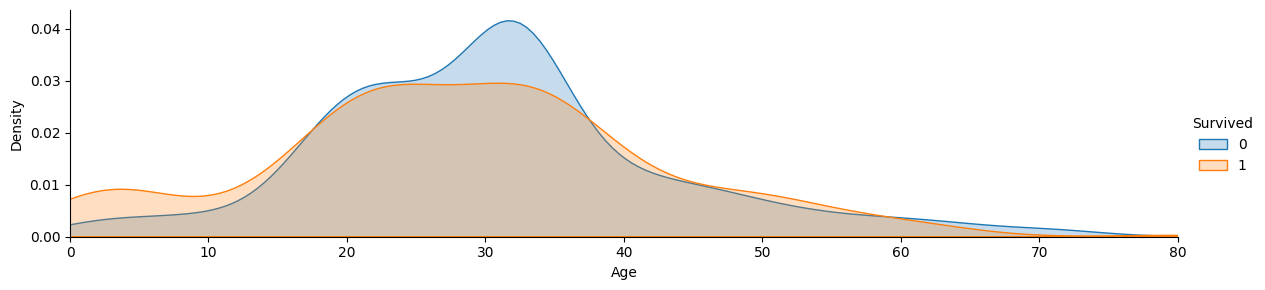

In [21]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",fill=True)
facet.set(xlim=(0,df["Age"].max()))
facet.add_legend()
plt.show()

(0.0, 20.0)

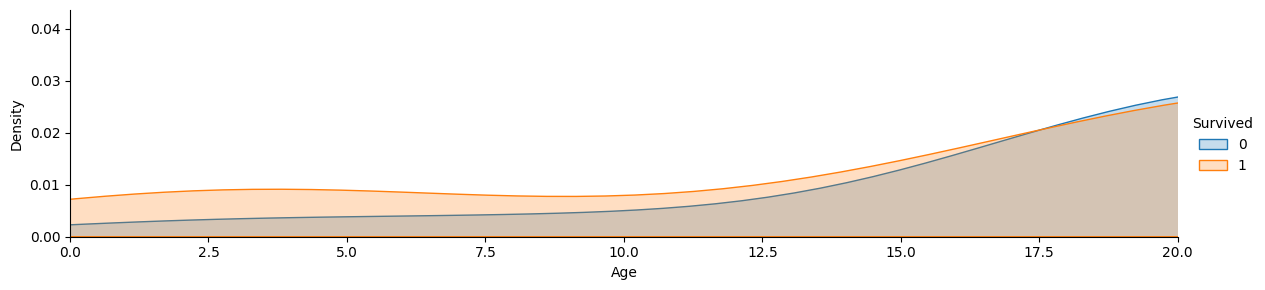

In [22]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",fill=True)
facet.set(xlim=(0,df["Age"].max()))
facet.add_legend()
plt.xlim(0,20) #para hacerle zoom

(20.0, 30.0)

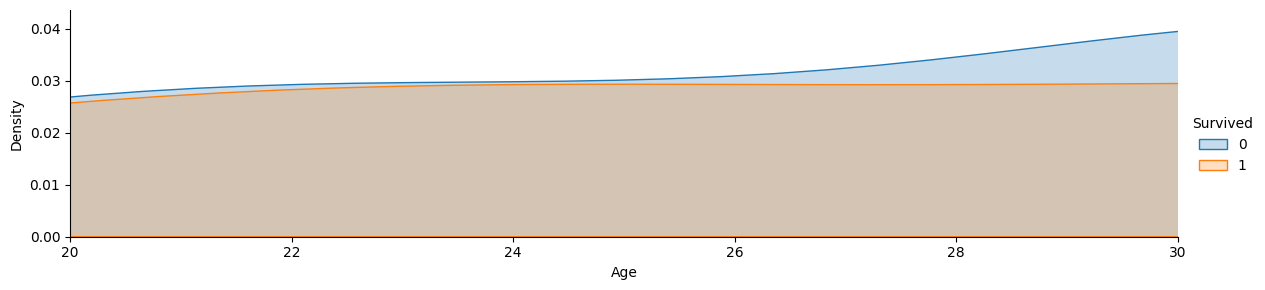

In [23]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",fill=True)
facet.set(xlim=(0,df["Age"].max()))
facet.add_legend()
plt.xlim(20,30) #para hacerle zoom

(30.0, 40.0)

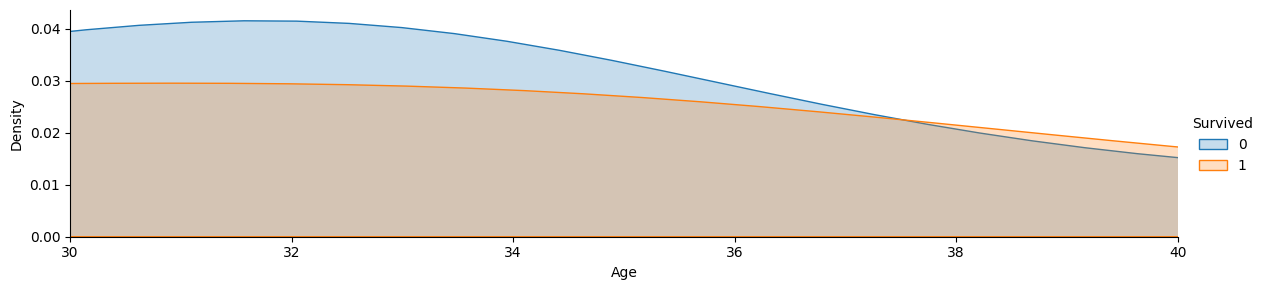

In [24]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",fill=True)
facet.set(xlim=(0,df["Age"].max()))
facet.add_legend()
plt.xlim(30,40) #para hacerle zoom

(40.0, 60.0)

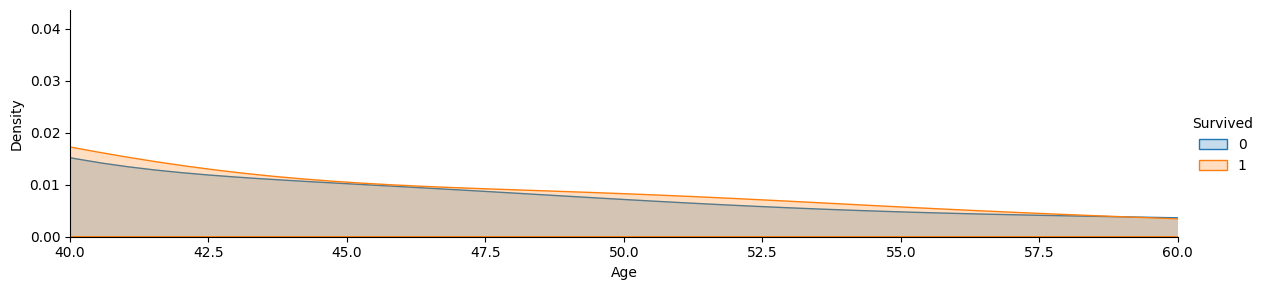

In [25]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",fill=True)
facet.set(xlim=(0,df["Age"].max()))
facet.add_legend()
plt.xlim(40,60) #para hacerle zoom

(60.0, 80.0)

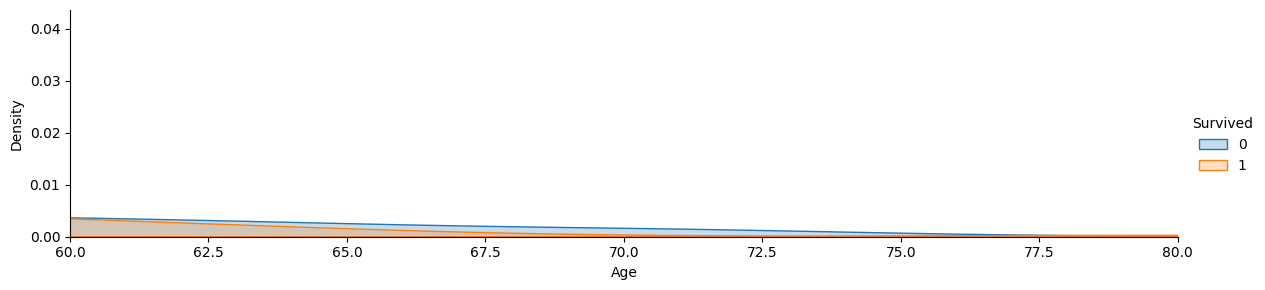

In [26]:
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",fill=True)
facet.set(xlim=(0,df["Age"].max()))
facet.add_legend()
plt.xlim(60) #para hacerle zoom

## 2.4.2 Bining
Es convertit una variable numérica a categórica, en este caso, la edad
* niño: 0
* joven: 1
* adulto: 2
* edad madura: 3
* edad avanzada: 4

In [27]:
df["Age_Category"]=pd.cut(df["Age"], bins=[0,16,26,36,62, float("inf")], labels=[0,1,2,3,4],right=False)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0,2


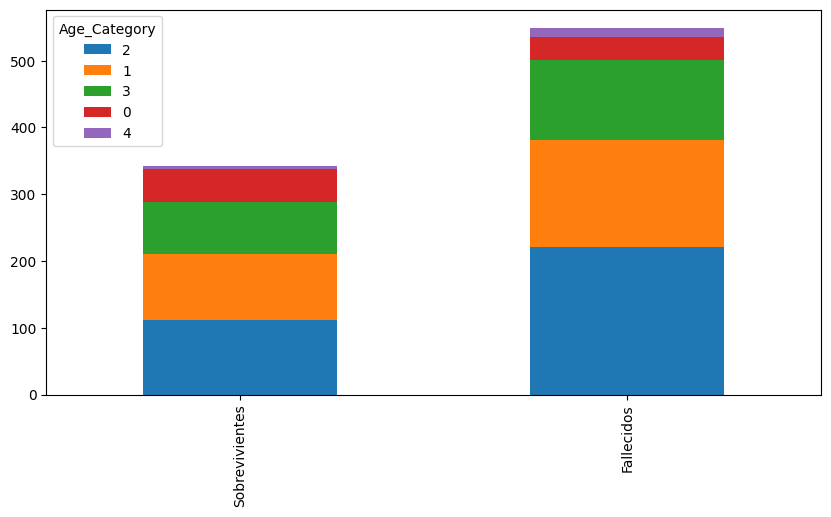

In [28]:
bar_char("Age_Category")

Se observa como había mayores probabilidades de sobrevivir para los niños

trataremos de identificar las filas que poseen los nulos de Embarked

In [29]:
filas_con_nulos = df[df['Fare'].isnull()]
filas_con_nulos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Category


fare convirtiendo las variables en categóricas pues no posee datos nulos




In [30]:

Max_Fare=df["Fare"].max()
Min_Fare=df["Fare"].min()
print("Máximo Fare:", Max_Fare)
print("Máximo Fare:", Min_Fare)

mediana_fare = df["Fare"].median()
print("Mediana de Fare:", mediana_fare)

Máximo Fare: 512.3292
Máximo Fare: 0.0
Mediana de Fare: 14.4542


In [31]:
df["Fare_Category"]=pd.cut(df["Fare"], bins=[0,5,14,50,300, float("inf")], labels=[0,1,2,3,4],right=False)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Category,Fare_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0,3,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0,2,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0,2,1


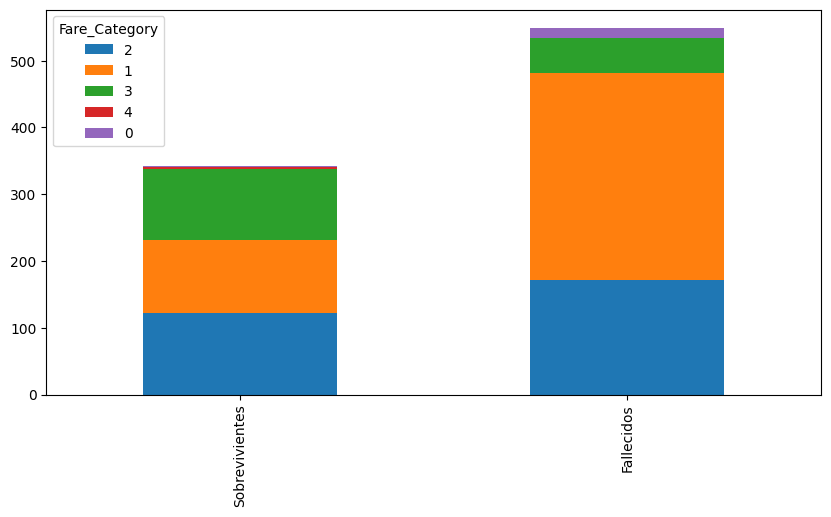

In [32]:
bar_char("Fare_Category")

mediante la grafica se observa que a mayor costo del pasaje, mayores eran las probabilidades de supervivencia.
---


In [33]:
filas_con_nulos = df[df['Embarked'].isnull()]
filas_con_nulos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Category,Fare_Category
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1.0,3,3
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,2.0,4,3


Llenar la columna Embarked con el valor que tenía mayor porcentaje de supervivencia en los pasajeros que sobrevivieron tiene sentido por varias razones, basadas en la lógica de análisis de datos y patrones de comportamiento en el conjunto de pasajeros:

Justificación:
Relacionar la supervivencia con las características del pasajero:

En los datos del Titanic, una de las variables más relevantes para determinar la probabilidad de supervivencia es la embarcación de origen (columna Embarked), que indica el puerto desde el cual el pasajero abordó el barco (C = Cherburgo, Q = Queenstown, S = Southampton).

Diferentes puertos de embarque pueden reflejar características demográficas y sociales de los pasajeros. Al observar que ciertos puertos tienen un mayor porcentaje de supervivencia entre los pasajeros, podemos hacer una inferencia: aquellos que partieron de esos puertos tenían más probabilidades de sobrevivir, probablemente debido a factores como la clase social, el tipo de pasajeros (ricos, famosos, etc.), o el comportamiento del rescate en esas zonas.

In [34]:
df['Embarked']=df['Embarked'].fillna('C')

In [35]:
filas_con_nulos = df[df['Embarked'].isnull()]
filas_con_nulos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Category,Fare_Category


# actividad 2


la imputación de esos valores probablemente no tendrá un gran impacto en los resultados globales del análisis.





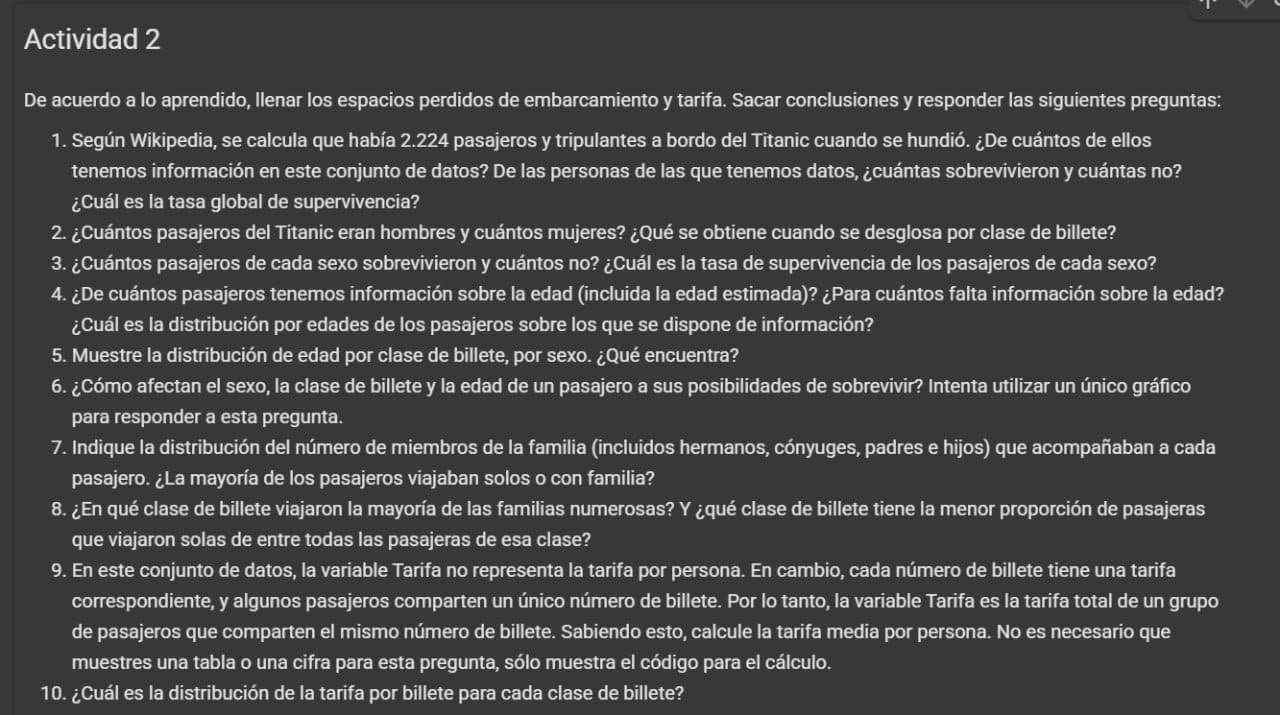

# 1. ¿De cuántos pasajeros tenemos información en este conjunto de datos?


In [38]:
# Total de pasajeros en el dataset
total_pasajeros = df.shape[0]

# Total de sobrevivientes y no sobrevivientes
total_sobrevivientes = df['Survived'].sum()
total_no_sobrevivientes = total_pasajeros - total_sobrevivientes

# Tasa global de supervivencia
tasa_supervivencia = total_sobrevivientes / total_pasajeros

total_pasajeros, total_sobrevivientes, total_no_sobrevivientes, tasa_supervivencia

(891, np.int64(342), np.int64(549), np.float64(0.3838383838383838))

Conclusión:

Total de pasajeros registrados en el dataset.
tenemos 891 pasageros registrados

Cantidad de sobrevivientes y no sobrevivientes.
N.supervivientes= 342
N.NoSupervivientes= 549

Tasa de supervivencia global.
0.38, Con esto sabemos que hay un 38% de supervivencia



#  ¿Cuántos pasajeros del Titanic eran hombres y cuántas mujeres?

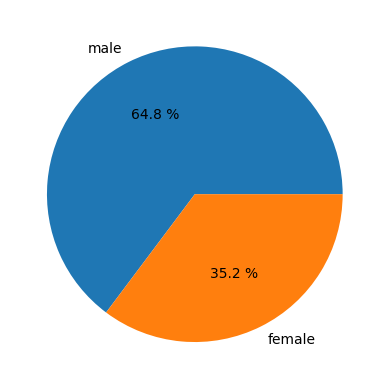

(Sex
 male      577
 female    314
 Name: count, dtype: int64,
 Pclass  Sex   
 1       female     94
         male      122
 2       female     76
         male      108
 3       female    144
         male      347
 dtype: int64)

In [44]:
# Contar por sexo
conteo_sexos = df['Sex'].value_counts()

# Desglosar por clase de billete
conteo_sexos_por_clase = df.groupby(['Pclass', 'Sex']).size()
nombres = ['male', 'female']
manzanas = df['Sex'].value_counts()
plt.pie(manzanas, labels=nombres, autopct="%0.1f %%")
plt.show()

conteo_sexos, conteo_sexos_por_clase


Conclusión:

Cantidad de hombres y mujeres abordo eran:
male 577
female 314


---


Desglosado por clase de billete, asi se distribuian:
Pclass  Sex   

*   clase 1
  * female     94
  * male      122
*   clase 2
  * female     76
  * male      108
*   clase 3
  * female    144
   * male      347








# ¿Cuántos pasajeros de cada sexo sobrevivieron y cuántos no?

<ipython-input-67-852dd9fe4fb9>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tasa_supervivencia_sexo[i] = round(tasa_supervivencia_sexo[i] * 100, 2)
<ipython-input-67-852dd9fe4fb9>:8: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  tasa_supervivencia_sexo[i] = round(tasa_supervivencia_sexo[i] * 100, 2)


(Survived    0    1
 Sex               
 female     81  233
 male      468  109,
 Sex
 female    74.20
 male      18.89
 dtype: float64)

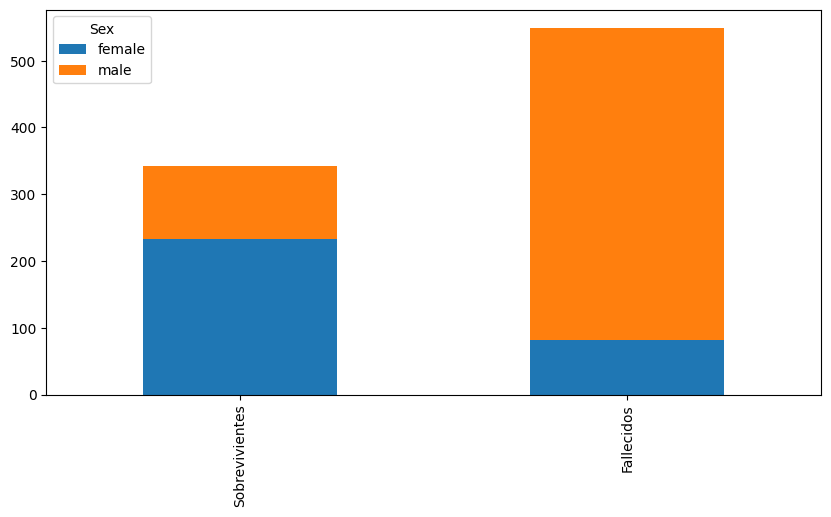

In [67]:
# Supervivencia por sexo
sobrevivencia_sexo = df.groupby(['Sex', 'Survived']).size().unstack()
bar_char("Sex")
# Tasa de supervivencia por sexo
tasa_supervivencia_sexo = sobrevivencia_sexo[1] / sobrevivencia_sexo.sum(axis=1)



sobrevivencia_sexo, tasa_supervivencia_sexo


Conclusión:

Número de sobrevivientes y no sobrevivientes desglosados por sexo.
*   no sobrevivientes
  * female     81
  * male      468
*   sobrevivientes
  * female     233
  * male       109        
  
Tasa de supervivencia por sexo.

* female    0.742038 o 74.2%
* male      0.188908 o 18.8%

# ¿De cuántos pasajeros tenemos información sobre la edad?

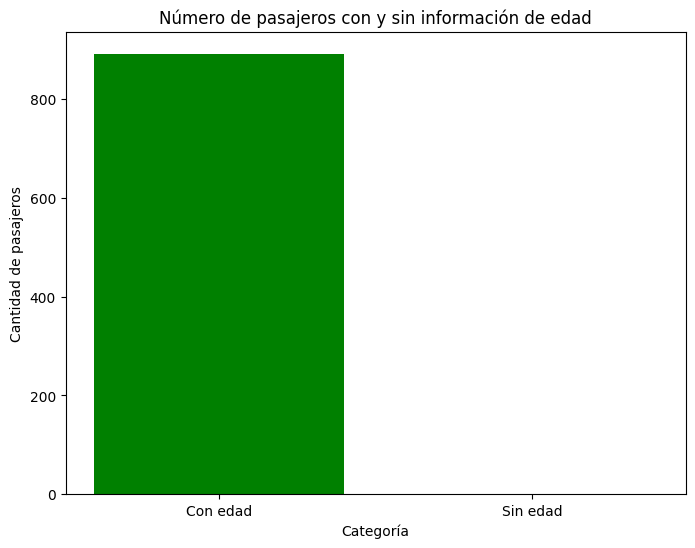

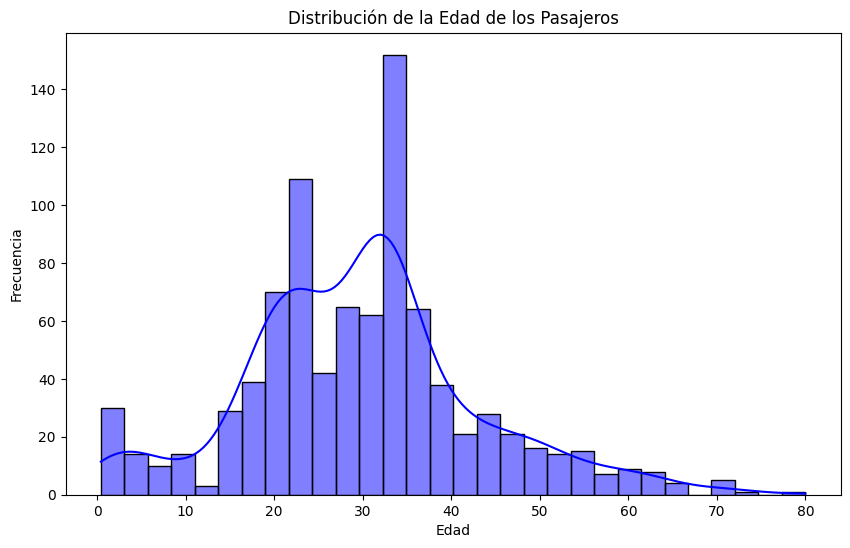

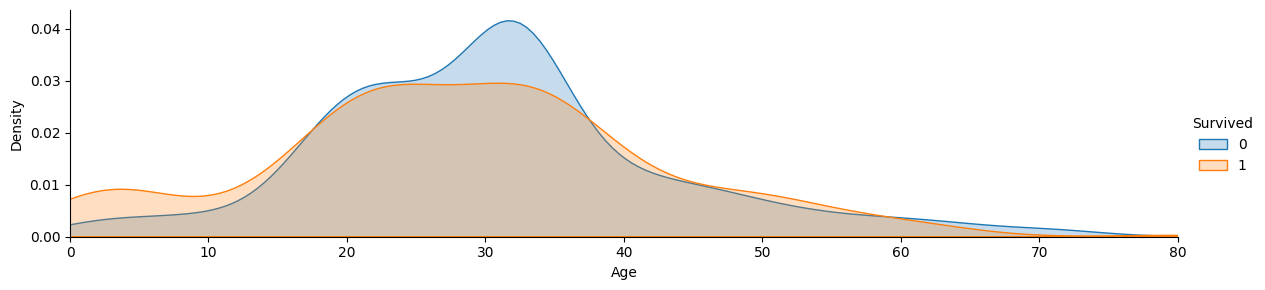

(np.int64(891),
 np.int64(0),
 count    891.000000
 mean      29.801633
 std       13.181485
 min        0.420000
 25%       21.773973
 50%       30.000000
 75%       35.898148
 max       80.000000
 Name: Age, dtype: float64)

In [54]:
# Contar pasajeros con información de edad
edad_completa = df['Age'].notna().sum()

# Contar pasajeros sin información de edad
edad_faltante = df['Age'].isna().sum()

# Distribución de la edad
distribucion_edad = df['Age'].dropna().describe()


# Gráfico de barras para los pasajeros con y sin información de edad
plt.figure(figsize=(8, 6))
edad_labels = ['Con edad', 'Sin edad']
edad_values = [edad_completa, edad_faltante]

plt.bar(edad_labels, edad_values, color=['green', 'red'])
plt.title('Número de pasajeros con y sin información de edad')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de pasajeros')
plt.show()

# Histograma de la distribución de la edad
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), bins=30, kde=True, color='blue')
plt.title('Distribución de la Edad de los Pasajeros')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()
facet=sns.FacetGrid(df,hue="Survived",aspect=4)
facet.map(sns.kdeplot,"Age",fill=True)
facet.set(xlim=(0,df["Age"].max()))
facet.add_legend()
plt.show()

edad_completa, edad_faltante, distribucion_edad

Conclusión:

Número de pasajeros con información de edad y sin información de edad.
* con informacion 891
* sin informacion 0

Distribución estadística de las edades de los pasajeros con información.
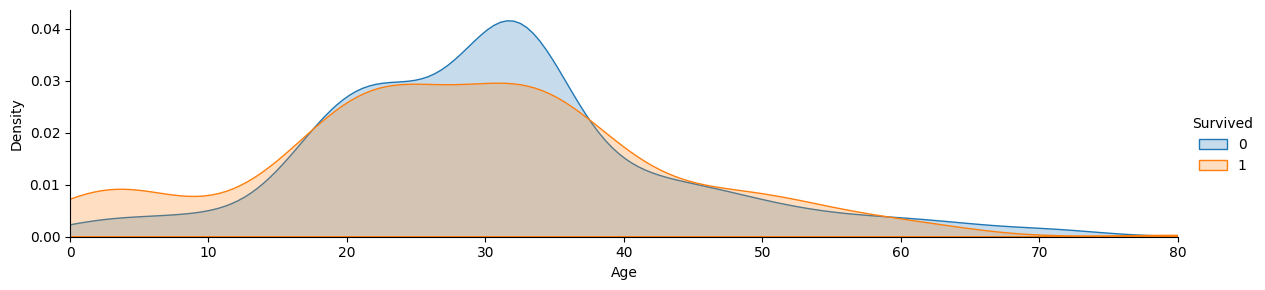


# 5. Distribución de edad por clase de billete y por sexo


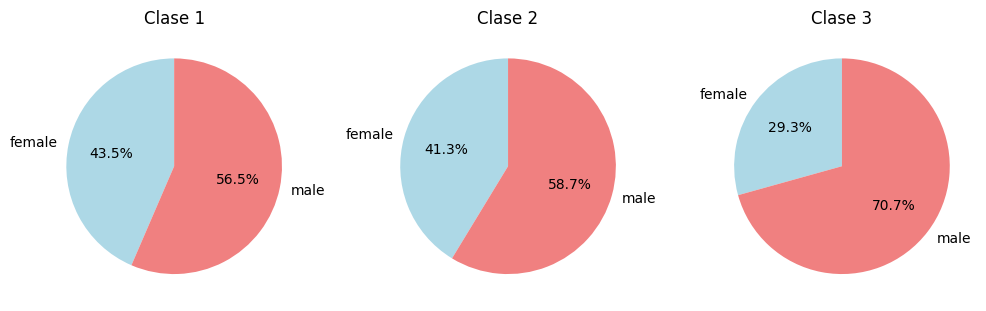

In [60]:

# Calcular la cantidad de pasajeros por combinación de clase de billete y sexo
conteo_combinado = df.dropna(subset=['Age']).groupby(['Pclass', 'Sex']).size().reset_index(name='Conteo')

# Crear un gráfico de pastel para cada combinación de Pclass y Sex
plt.figure(figsize=(10,6))

# Dibujar el gráfico de pastel por cada combinación de Pclass y Sex
for i, (clase, grupo) in enumerate(conteo_combinado.groupby('Pclass')):
    plt.subplot(1, 3, i + 1)
    plt.pie(grupo['Conteo'], labels=grupo['Sex'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
    plt.title(f'Clase {clase}')

# Mostrar la gráfica
plt.tight_layout()
plt.show()



Conclusión:

en la grafica se puede observar que en la unica clase que se presenta un desvalance en la poblacion son de la clase 3 teniendo un mayor numero de hombres mas grande que en las otras clases.

# 6. ¿Cómo afectan el sexo, la clase de billete y la edad a las posibilidades de sobrevivir?

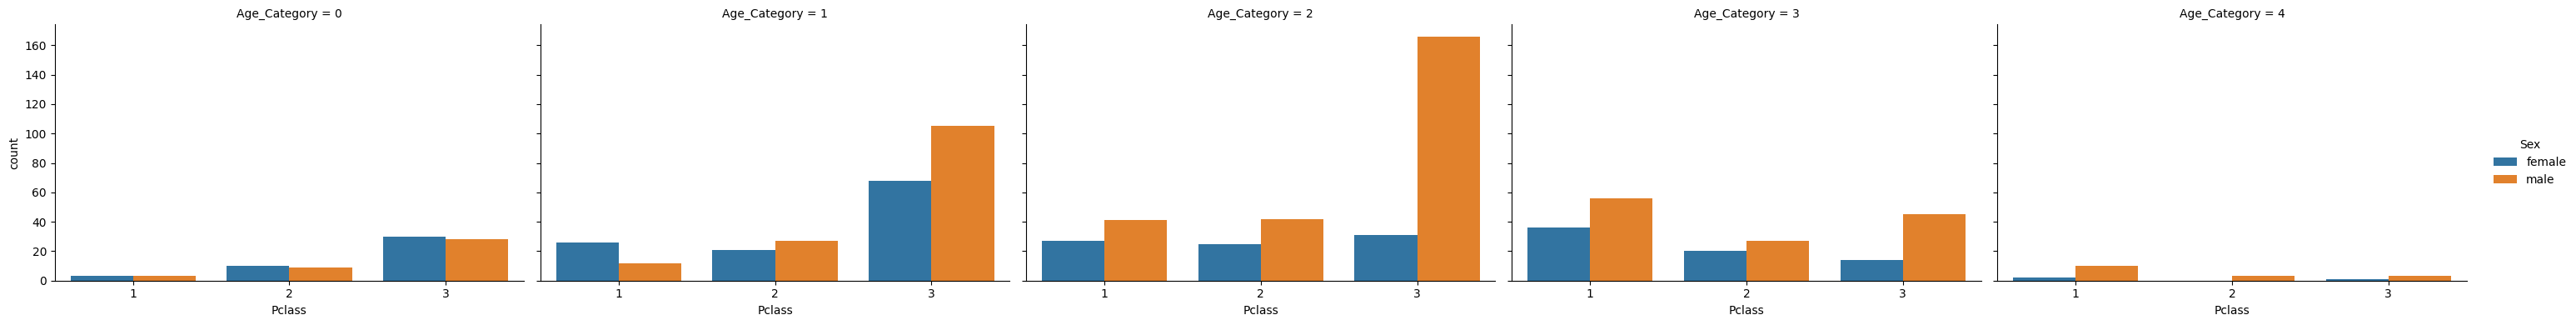

,Age_Category,Age
300,1,21.773973
548,2,33.000000
580,1,25.000000
483,4,63.000000
68,1,17.000000
727,1,21.773973
820,3,52.000000
377,2,27.000000
236,3,44.000000
216,2,27.000000


In [64]:
# Gráfico de barras sobre las tasas de supervivencia

sns.catplot(x='Pclass', hue='Sex', col='Age_Category', data=df, kind='count', height=4, aspect=1.5)
plt.show()
df[["Age_Category","Age"]].sample(15)


Este gráfico puede mostrar la influencia del sexo, la clase de billete y la edad en la tasa de supervivencia.


en la grafica resultante se puede ver la diferenciacio por sexo, clase y edad en lo cual se logra observar que quienes poseian una mayor taza de supervivencia resultan ser las personas de clase primera clase, que sean mujeres y que esten en la categoria de edad 0



# 7. Distribución del número de miembros de la familia (SibSp + Parch)


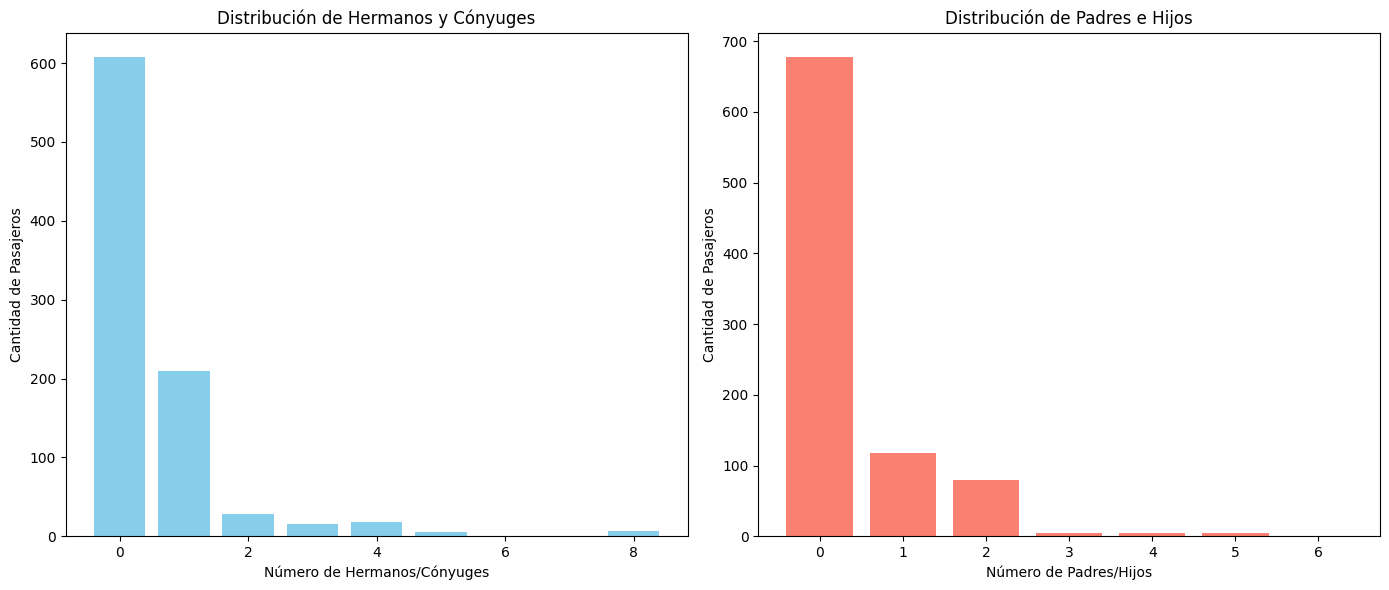

In [70]:
# Dividir los miembros de la familia en dos grupos: hermanos/cónyuges y padres/hijos
df['Hermanos_Co'] = df['SibSp']  # Hermanos y cónyuges
df['Padres_Hijos'] = df['Parch']  # Padres e hijos

# Contar cuántos pasajeros viajaban con hermanos/cónyuges y cuántos con padres/hijos
conteo_hermanos_co = df['Hermanos_Co'].value_counts().sort_index()
conteo_padres_hijos = df['Padres_Hijos'].value_counts().sort_index()

# Graficar la distribución
import matplotlib.pyplot as plt

# Crear dos gráficos para visualizar la distribución de hermanos/cónyuges y padres/hijos
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Distribución de hermanos y cónyuges
ax[0].bar(conteo_hermanos_co.index, conteo_hermanos_co.values, color='skyblue')
ax[0].set_title('Distribución de Hermanos y Cónyuges')
ax[0].set_xlabel('Número de Hermanos/Cónyuges')
ax[0].set_ylabel('Cantidad de Pasajeros')

# Distribución de padres e hijos
ax[1].bar(conteo_padres_hijos.index, conteo_padres_hijos.values, color='salmon')
ax[1].set_title('Distribución de Padres e Hijos')
ax[1].set_xlabel('Número de Padres/Hijos')
ax[1].set_ylabel('Cantidad de Pasajeros')

plt.tight_layout()
plt.show()




se puede obcervar que la cantidad de numero de miembre de familia con mayor cantida es de cero, esa la mayor cantidad de personas que habiane en la embarcacion iban solo ademas de eso la mayoria de la embarcacion en la otra grafica muestra que viajaban sin hijos

# ¿En qué clase de billete viajaron las familias numerosas?

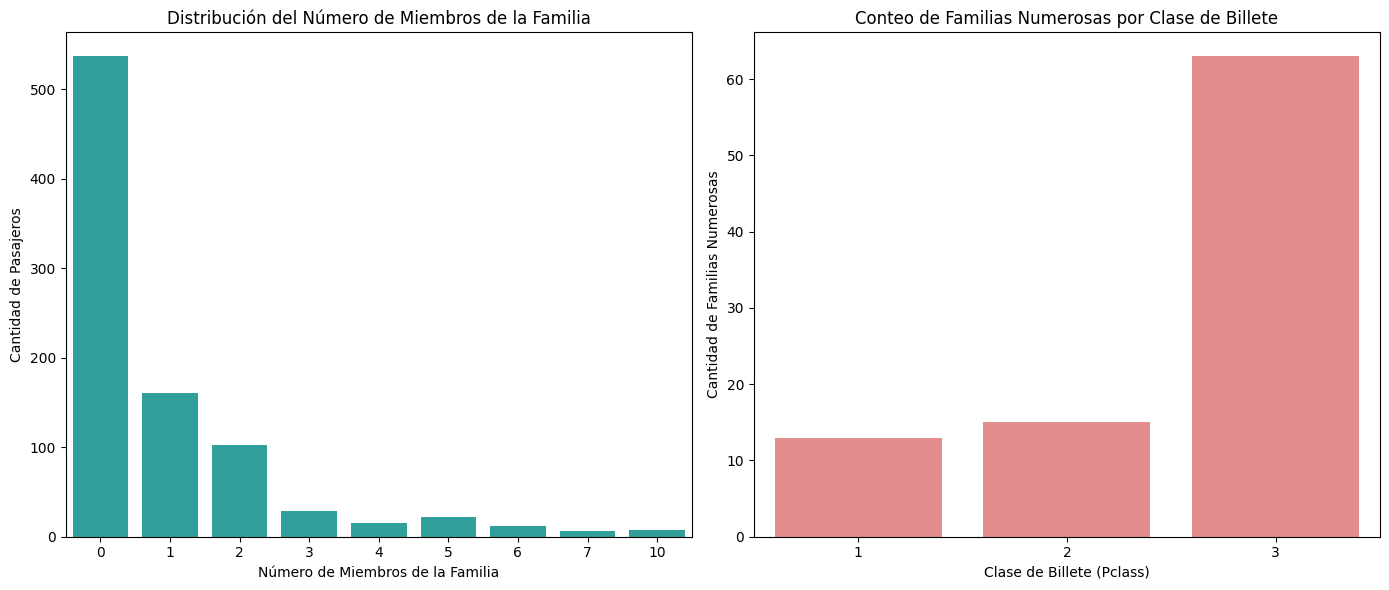

(Familia
 0     537
 1     161
 2     102
 3      29
 4      15
 5      22
 6      12
 7       6
 10      7
 Name: count, dtype: int64,
 Pclass
 3    63
 2    15
 1    13
 Name: count, dtype: int64)

In [78]:
plt.figure(figsize=(14, 6))

# Gráfico 1: Distribución del número de miembros de la familia (solo familias numerosas)
plt.subplot(1, 2, 1)
sns.barplot(x=distribucion_familia.index, y=distribucion_familia.values, color='lightseagreen')
plt.title('Distribución del Número de Miembros de la Familia')
plt.xlabel('Número de Miembros de la Familia')
plt.ylabel('Cantidad de Pasajeros')

# Gráfico 2: Conteo de familias numerosas por clase de billete
plt.subplot(1, 2, 2)
sns.barplot(x=conteo_familias_numerosas.index, y=conteo_familias_numerosas.values, color='lightcoral')
plt.title('Conteo de Familias Numerosas por Clase de Billete')
plt.xlabel('Clase de Billete (Pclass)')
plt.ylabel('Cantidad de Familias Numerosas')

# Mostrar las gráficas
plt.tight_layout()
plt.show()

# Filtrar familias numerosas (más de 2 miembros)
df['Familia'] = df['SibSp'] + df['Parch']
familias_numerosas = df[df['Familia'] > 2]
# Distribución de los miembros de la familia
distribucion_familia = df['Familia'].value_counts().sort_index()


# Contar por clase de billete
conteo_familias_numerosas = familias_numerosas['Pclass'].value_counts()
distribucion_familia,conteo_familias_numerosas

deacuerdo a siertos investigaciones se considera una familia numerosa despues de los aquellas que son conformadas por 3 o mas miembros

**Análisis de los datos proporcionados:**Distribución de Familias por Tamaño:

Las familias con 0 miembros son las más numerosas, con 537 pasajeros.

Las familias de 1 miembro y las familias de 2 miembros también son bastante comunes.

A medida que el número de miembros de la familia aumenta, la cantidad de familias disminuye. Las familias de 10 miembros son las menos comunes (solo 7 pasajeros).

Distribución de Familias Numerosas por Clase de Billete:

La clase 3 tiene la mayor cantidad de familias numerosas, con 63 pasajeros.

La clase 2 tiene 15 pasajeros de familias numerosas.

La clase 1 tiene 13 pasajeros de familias numerosas.

Respuestas a las preguntas:
¿En qué clase de billete viajaron la mayoría de las familias numerosas?

Clase 3 tiene la mayor cantidad de familias numerosas, con 63 pasajeros. Esto sugiere que las familias numerosas tienden a viajar en clases más económicas.

¿Qué clase de billete tiene la menor proporción de pasajeras?

Para calcular la menor proporción de pasajeras, necesitamos observar cuántas mujeres (o pasajeras) hay en cada clase en comparación con el total de pasajeros en esa clase.



# 9. Calcular la tarifa media por persona

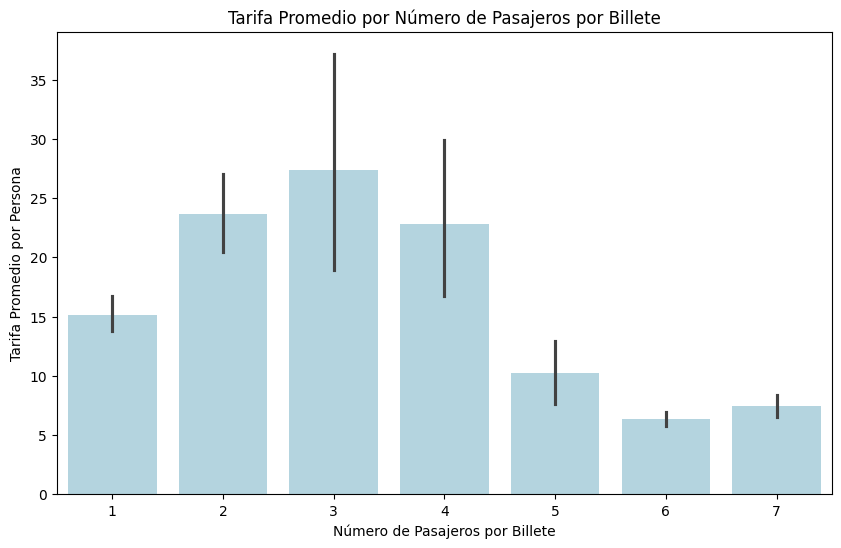

np.float64(17.788988832772166)

In [82]:
# Dividir la tarifa total por el número de personas por billete
df['Num_Passengers'] = df.groupby('Ticket')['Ticket'].transform('count')
df['Tarifa_Promedio'] = df['Fare'] / df['Num_Passengers']

# Gráfico de barras para mostrar la tarifa promedio por número de pasajeros
plt.figure(figsize=(10, 6))
sns.barplot(x=df['Num_Passengers'], y=df['Tarifa_Promedio'], color='lightblue')

# Añadir título y etiquetas
plt.title('Tarifa Promedio por Número de Pasajeros por Billete')
plt.xlabel('Número de Pasajeros por Billete')
plt.ylabel('Tarifa Promedio por Persona')

# Mostrar la gráfica
plt.show()


# Tarifa promedio por persona
tarifa_promedio = df['Tarifa_Promedio'].mean()

tarifa_promedio


Justificación del Cálculo:
Identificación del número de pasajeros por billete: Cada billete puede ser compartido por múltiples pasajeros. Por lo tanto, antes de calcular la tarifa por persona, primero necesitamos saber cuántas personas comparten cada número de billete. Esto lo logramos usando el método groupby('Ticket') para agrupar a los pasajeros que comparten el mismo billete y luego contamos cuántos pasajeros hay en cada grupo con transform('count'). Esto nos da el número de pasajeros que están asociados con cada billete.


`df['Num_Passengers'] = df.groupby('Ticket')['Ticket'].transform('count')`
La nueva columna Num_Passengers contiene el número de pasajeros asociados a cada billete. Por ejemplo, si un billete tiene 3 personas asociadas, todos los pasajeros con ese billete tendrán un valor de 3 en la columna Num_Passengers.

Calcular la tarifa promedio por persona: Ahora que sabemos cuántas personas comparten cada billete, podemos dividir la tarifa total (Fare) de ese billete entre el número de pasajeros (Num_Passengers) para obtener la tarifa promedio por persona en ese grupo.



`df['Tarifa_Promedio'] = df['Fare'] / df['Num_Passengers']`
Esto nos da la tarifa promedio por persona en cada billete. Es importante recordar que la tarifa original (Fare) es una tarifa total para todos los pasajeros del billete, no para cada persona individualmente.

Gráfico para visualizar la tarifa promedio por número de pasajeros: Al crear el gráfico de barras, queremos ver cómo varía la tarifa promedio por persona en función del número de pasajeros por billete. Esto nos puede ayudar a entender si los billetes con más personas tienden a tener tarifas promedio más bajas por persona (es decir, las tarifas totales se distribuyen entre más personas).



```
plt.figure(figsize=(10, 6))
sns.barplot(x=df['Num_Passengers'], y=df['Tarifa_Promedio'], color='lightblue')
plt.title('Tarifa Promedio por Número de Pasajeros por Billete')
plt.xlabel('Número de Pasajeros por Billete')
plt.ylabel('Tarifa Promedio por Persona')
plt.show()
```


Calcular la tarifa promedio general: Finalmente, para obtener la tarifa promedio por persona en todo el conjunto de datos, calculamos el promedio de la columna Tarifa_Promedio, lo que nos da una visión global de cuánto pagó en promedio cada pasajero:


```
tarifa_promedio = df['Tarifa_Promedio'].mean()
```


El valor resultante es 17.79, que indica que, en promedio, cada pasajero pagó alrededor de 17.79 unidades de la moneda correspondiente.

Conclusión:
Este enfoque es adecuado porque:

La tarifa Fare representa la tarifa total para un grupo de pasajeros que comparten el mismo billete.

Dividir la tarifa total entre el número de pasajeros en cada grupo nos da una tarifa promedio por persona.

El gráfico muestra cómo varía la tarifa promedio por persona según el número de pasajeros por billete, lo que puede revelar patrones interesantes.

# 10. Distribución de la tarifa por billete para cada clase de billete


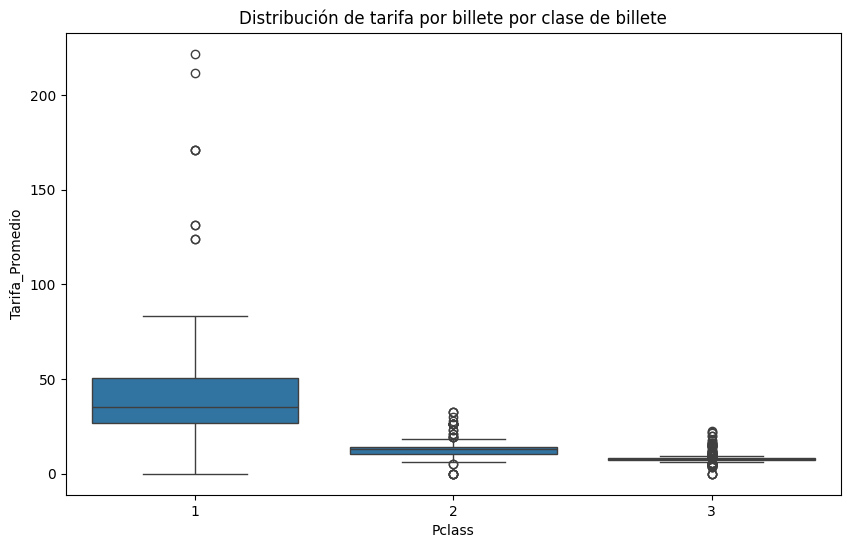

In [83]:
# Distribución de la tarifa promedio por billete según clase
plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass', y='Tarifa_Promedio', data=df)
plt.title('Distribución de tarifa por billete por clase de billete')
plt.show()


* Primera clase (Pclass = 1):

  * Tiene las tarifas más altas en promedio.

  * Hay mucha dispersión en los precios, con varios valores atípicos (outliers) muy altos, superando incluso los 200.

  * El rango intercuartílico (la "caja") es amplio, indicando bastante variabilidad en los precios dentro de la primera clase.

* Segunda clase (Pclass = 2):

  * Las tarifas son más bajas que en primera clase y menos variables.

  * También hay algunos valores atípicos, pero no tan extremos como en la primera clase.

  * Los precios están más concentrados en un rango más estrecho.

* Tercera clase (Pclass = 3):

  * Tiene las tarifas más bajas en general.

  * La dispersión es pequeña, y aunque hay algunos outliers, el precio de la mayoría de los boletos está en un rango muy reducido.

Conclusión general:
A mayor clase del boleto (1ª clase), mayor es la tarifa promedio y la variabilidad de precios. La 3ª clase es la más económica y homogénea en precios.